In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
import praw

reddit = praw.Reddit(client_id='HIuyPRlQtMIsjQ',
                     client_secret='PTekzmZjerluEHt53qnTQgCyINA',
                     user_agent='spfa8301')

In [3]:
headlines = set()


In [4]:
for submission in reddit.subreddit('starwars').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

965


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA



In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Fairbairnsj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Looking for the canon New republic logo as a patch for a pilot cosplay. Anyone know '
              'where I can find one?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.5598,
  'headline': 'Why are hutts so powerful?',
  'neg': 0.0,
  'neu': 0.525,
  'pos': 0.475},
 {'compound': 0.0, 'headline': "Han's last name (spoilers)", 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.0000,Looking for the canon New republic logo as a p...,0.0,1.000,0.000
1,0.5598,Why are hutts so powerful?,0.0,0.525,0.475
2,0.0000,Han's last name (spoilers),0.0,1.000,0.000
3,0.6705,Would anyone be interested in a Knights of Ren...,0.0,0.645,0.355
4,0.0000,I did a thing! Boba Fett!,0.0,1.000,0.000


In [9]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.0000,Looking for the canon New republic logo as a p...,0.0,1.000,0.000,0
1,0.5598,Why are hutts so powerful?,0.0,0.525,0.475,1
2,0.0000,Han's last name (spoilers),0.0,1.000,0.000,0
3,0.6705,Would anyone be interested in a Knights of Ren...,0.0,0.645,0.355,1
4,0.0000,I did a thing! Boba Fett!,0.0,1.000,0.000,0


In [10]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [11]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Why are hutts so powerful?',
 'Would anyone be interested in a Knights of Ren comic series by Marvel?',
 'The Princess & her favorite walking carpet',
 'Jedi Knights ready for handing out candy',
 'First time here. Just wanted to share a drawing my little sister made to celebrate the return of the Clone Wars. Hope you guys like it!']

Negative headlines:

["It All Makes Sense Now (Rian destroyed JJ's mystery box)",
 'When the Empire mistakes Canada for Hoth',
 "Police Investigating Theft on Set of 'Star Wars' Series 'The Mandalorian'",
 "This is canon now, I don't care what you say! I present Lord Lucas of Coruscant...",
 'Star Wars: John Williams Recovering From Hospitalization']


In [12]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    493
-1    258
 1    214
Name: label, dtype: int64
 0    51.088083
-1    26.735751
 1    22.176166
Name: label, dtype: float64


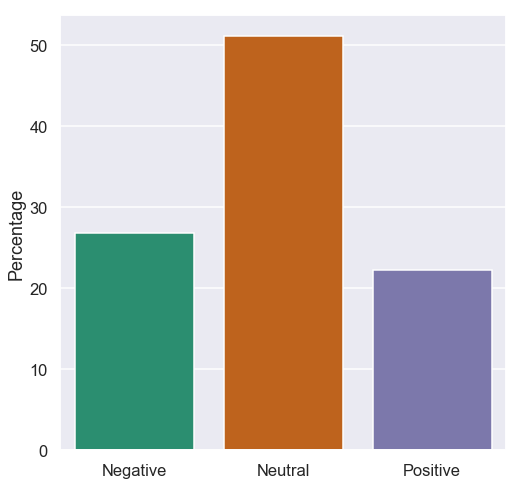

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [14]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [16]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [17]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [18]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('halloween', 19),
 ('like', 17),
 ('wars', 15),
 ('star', 15),
 ('would', 14),
 ('jedi', 14),
 ('made', 13),
 ('one', 13),
 ('costume', 12),
 ('think', 12),
 ('good', 12),
 ('thought', 12),
 ('favorite', 11),
 ('happy', 11),
 ('new', 11),
 ('friend', 11),
 ('best', 11),
 ('fan', 10),
 ('episode', 10),
 ('first', 9)]

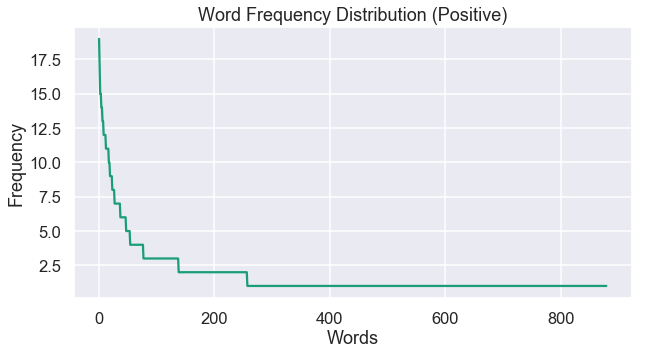

In [19]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

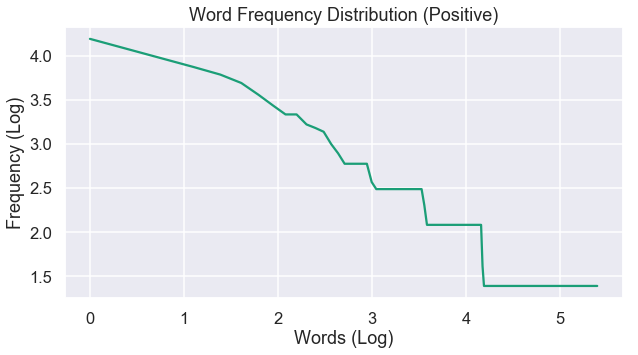

In [20]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [21]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('star', 154),
 ('wars', 153),
 ('episode', 18),
 ('new', 16),
 ('one', 13),
 ('story', 13),
 ('think', 12),
 ('jedi', 12),
 ('would', 12),
 ('anyone', 11),
 ('death', 10),
 ('resistance', 10),
 ('clone', 10),
 ('last', 9),
 ('back', 9),
 ('force', 9),
 ('made', 9),
 ('else', 8),
 ('darth', 8),
 ('like', 8)]

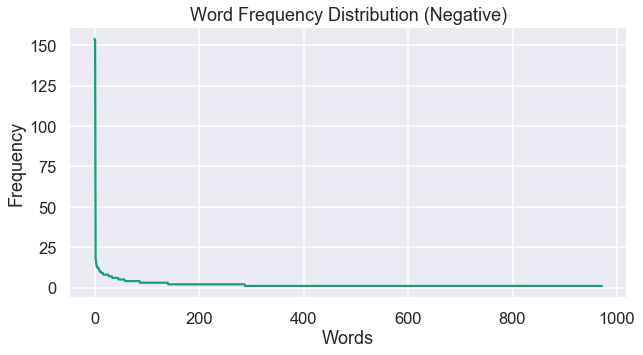

In [22]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

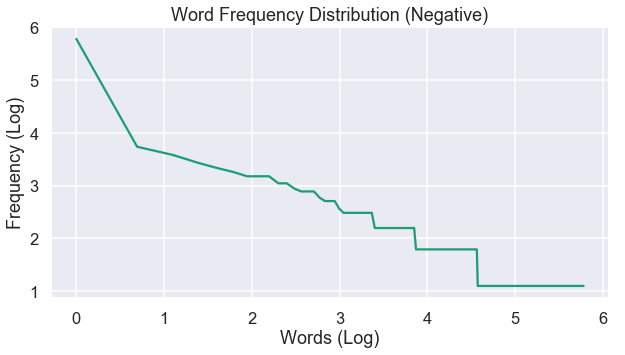

In [23]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()